In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import pickle
from PIL import Image
from glob import glob
%matplotlib inline

In [2]:
race = glob('age/*.jpg')

In [3]:
race[:3]

['age\\100_1_0_20170110183726390.jpg.chip.jpg',
 'age\\100_1_2_20170105174847679.jpg.chip.jpg',
 'age\\101_1_2_20170105174739309.jpg.chip.jpg']

In [24]:
def getSize(file):
    # go through every image and return the size 
    img = Image.open(file)
    return img.size[0]

In [25]:
df = pd.DataFrame(data=race, columns=['path'])

In [26]:
df['size'] = df['path'].apply(getSize)

In [27]:
df.describe()

,size
count,9780.0
mean,200.0
std,0.0
min,200.0
25%,200.0
50%,200.0
75%,200.0
max,200.0


In [28]:
string = df['path'][0]

In [29]:
string

'age\\100_1_0_20170110183726390.jpg.chip.jpg'

In [30]:
string.split('\\')[1].split('_')

['100', '1', '0', '20170110183726390.jpg.chip.jpg']

In [31]:
int(string.split('\\')[1].split('_')[2])

0

In [32]:
def lab(string):
    try:
        return int(string.split('\\')[1].split('_')[2])
    except:
        return None

In [33]:
df['race'] = df['path'].apply(lab)

In [34]:
df.isnull().sum()

path    0
size    0
race    2
dtype: int64

In [35]:
df = df.dropna(axis=0)

In [37]:
df

,path,size,race
0,age\100_1_0_20170110183726390.jpg.chip.jpg,200,0.0
1,age\100_1_2_20170105174847679.jpg.chip.jpg,200,2.0
2,age\101_1_2_20170105174739309.jpg.chip.jpg,200,2.0
3,age\10_0_0_20161220222308131.jpg.chip.jpg,200,0.0
4,age\10_0_0_20170103200329407.jpg.chip.jpg,200,0.0
...,...,...,...
9775,age\9_1_3_20161220222856346.jpg.chip.jpg,200,3.0
9776,age\9_1_3_20170104222949455.jpg.chip.jpg,200,3.0
9777,age\9_1_4_20170103200637399.jpg.chip.jpg,200,4.0
9778,age\9_1_4_20170103200814791.jpg.chip.jpg,200,4.0


In [38]:
def transforming(path_to_resize):

    img = cv2.imread(path_to_resize)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img =cv2.resize(img, (48, 48))

    return img

In [39]:
df['image'] = df['path'].apply(transforming)

In [40]:
df.head()

,path,size,race,image
0,age\100_1_0_20170110183726390.jpg.chip.jpg,200,0.0,"[[[231, 235, 242], [153, 165, 188], [98, 116, ..."
1,age\100_1_2_20170105174847679.jpg.chip.jpg,200,2.0,"[[[48, 38, 29], [42, 32, 23], [43, 33, 24], [4..."
2,age\101_1_2_20170105174739309.jpg.chip.jpg,200,2.0,"[[[207, 228, 220], [208, 231, 216], [209, 231,..."
3,age\10_0_0_20161220222308131.jpg.chip.jpg,200,0.0,"[[[102, 75, 45], [95, 68, 32], [93, 63, 29], [..."
4,age\10_0_0_20170103200329407.jpg.chip.jpg,200,0.0,"[[[99, 67, 56], [108, 70, 57], [90, 45, 26], [..."


In [42]:
df['race'] = df['race'].astype(int)

In [44]:
df.head()

,path,size,race,image
0,age\100_1_0_20170110183726390.jpg.chip.jpg,200,0,"[[[231, 235, 242], [153, 165, 188], [98, 116, ..."
1,age\100_1_2_20170105174847679.jpg.chip.jpg,200,2,"[[[48, 38, 29], [42, 32, 23], [43, 33, 24], [4..."
2,age\101_1_2_20170105174739309.jpg.chip.jpg,200,2,"[[[207, 228, 220], [208, 231, 216], [209, 231,..."
3,age\10_0_0_20161220222308131.jpg.chip.jpg,200,0,"[[[102, 75, 45], [95, 68, 32], [93, 63, 29], [..."
4,age\10_0_0_20170103200329407.jpg.chip.jpg,200,0,"[[[99, 67, 56], [108, 70, 57], [90, 45, 26], [..."


In [45]:
df.drop(['path', 'size'], axis=1,inplace=True)

In [46]:
#shuffle
df = df.sample(frac = 1) 

In [47]:
df['image'][0].shape

(48, 48, 3)

In [48]:
x = np.asarray(df['image'].tolist())

In [49]:
x.shape

(9778, 48, 48, 3)

In [50]:
y = np.asarray(df['race'].tolist())

In [51]:
y.shape

(9778,)

In [2]:
import keras
import itertools

from keras.utils.np_utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from sklearn.model_selection import train_test_split


In [53]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(x,y, test_size=0.25)

In [123]:
x_train = X_TRAIN / 255
x_test = X_TEST / 255
y_train = np.asarray(Y_TRAIN).astype('float32').reshape((-1,1))
y_test = np.asarray(Y_TEST).astype('float32').reshape((-1,1))

In [124]:
x_train.shape

(7333, 48, 48, 3)

In [125]:
y_train.shape

(7333, 1)

In [126]:
from keras.callbacks import Callback

In [127]:
class myEarlyStop(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy') > 0.95):
            self.model.stop_training = True

callback=myEarlyStop()

In [141]:
input_shape = (48, 48, 3)

model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape, padding='same'))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(256,(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 6, 6, 256)        

In [142]:
model.compile(optimizer = 'adam' , loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [143]:
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1 # Randomly zoom image 
)
# Fit the model
#validation_data=(x_val,y_val)
epochs = 50
batch_size = 32
model.fit(x_train,y_train, batch_size=batch_size,
                              epochs = epochs,
                              verbose = 1,
                              callbacks=[callback]
                              )

Epoch 1/50
230/230 [==============================] - 48s 204ms/step - loss: 1.2842 - accuracy: 0.5314
Epoch 2/50
230/230 [==============================] - 49s 213ms/step - loss: 0.8601 - accuracy: 0.6824
Epoch 3/50
230/230 [==============================] - 54s 237ms/step - loss: 0.7366 - accuracy: 0.7329
Epoch 4/50
230/230 [==============================] - 46s 202ms/step - loss: 0.6113 - accuracy: 0.7762
Epoch 5/50
230/230 [==============================] - 46s 200ms/step - loss: 0.5568 - accuracy: 0.7960
Epoch 6/50
230/230 [==============================] - 46s 201ms/step - loss: 0.4598 - accuracy: 0.8334
Epoch 7/50
230/230 [==============================] - 46s 201ms/step - loss: 0.3852 - accuracy: 0.8587
Epoch 8/50
230/230 [==============================] - 46s 200ms/step - loss: 0.3186 - accuracy: 0.8809
Epoch 9/50
230/230 [==============================] - 46s 201ms/step - loss: 0.2420 - accuracy: 0.9111
Epoch 10/50
230/230 [==============================] - 47s 205ms/step - l

In [144]:
model.save('92_race.h5')

In [3]:
import cv2
from keras.models import load_model

In [7]:
model = load_model('92_race.h5')

In [5]:
from keras.preprocessing import image

In [6]:
from PIL import Image
from skimage import transform

In [14]:
haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
def prediction(img, model):
    
    img = cv2.imread(img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    faces = haar.detectMultiScale(img,1.5,5)
    
    for x,y,w,h in faces:
        cropped = img[y:y+h, x:x+w]
    plt.imshow(cropped)
    np_image = np.array(cropped).astype('float32')/255

    np_image = transform.resize(np_image, (48,48,3))

    np_image = np.expand_dims(np_image, axis=0)


    pred = model.predict(np_image)
    
    prediction = np.where(pred[0] == max(pred[0]))
    prediction = prediction[0][0]
    if prediction == 0:
        print('White')
    elif prediction == 1:
        print('Black')
    elif prediction == 2:
        print('Asian')
    elif prediction == 3:
        print('Indian')
    elif prediction == 4:
        print('Other')
    #elif prediction == 5:
   #     print('Sadness')
    #elif prediction == 6:
    #    print('Surprise')

White


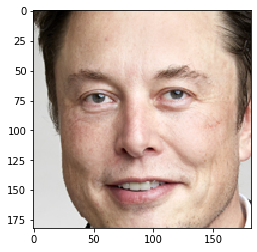

In [15]:
prediction('elon.jpg', model)

Other


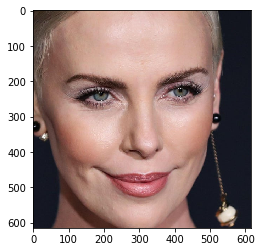

In [17]:
prediction('charlize_theron.jpg', model)

Indian


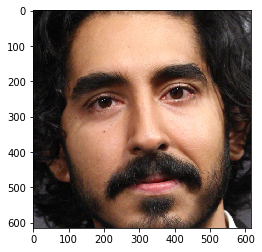

In [18]:
prediction('dev_patel.jpg', model)

Asian


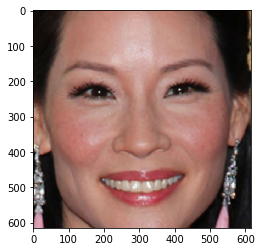

In [16]:
prediction('lucy_liu.jpg', model)